In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv")
df

,Date,Beer_Sale
0,01-01-1963,591
1,02-01-1963,464
2,03-01-1963,461
3,04-01-1963,605
4,05-01-1963,586
...,...,...
703,08-01-2021,668
704,09-01-2021,725
705,10-01-2021,649
706,11-01-2021,725


In [4]:
df.head(5).append(df.tail(5))

,Date,Beer_Sale
0,01-01-1963,591
1,02-01-1963,464
2,03-01-1963,461
3,04-01-1963,605
4,05-01-1963,586
703,08-01-2021,668
704,09-01-2021,725
705,10-01-2021,649
706,11-01-2021,725
707,12-01-2021,811


In [5]:
series=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv",header=0,index_col=0)
series.head()

,Beer_Sale
Date,
01-01-1963,591
02-01-1963,464
03-01-1963,461
04-01-1963,605
05-01-1963,586


<AxesSubplot:xlabel='Date'>

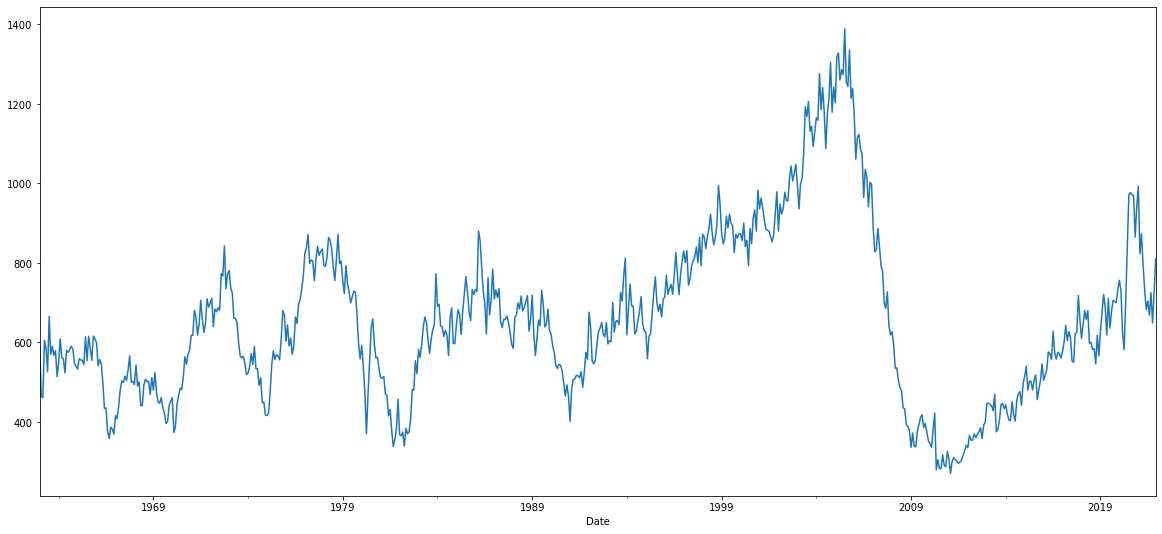

In [18]:
plt.rcParams["figure.figsize"] = [20,9]
series.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

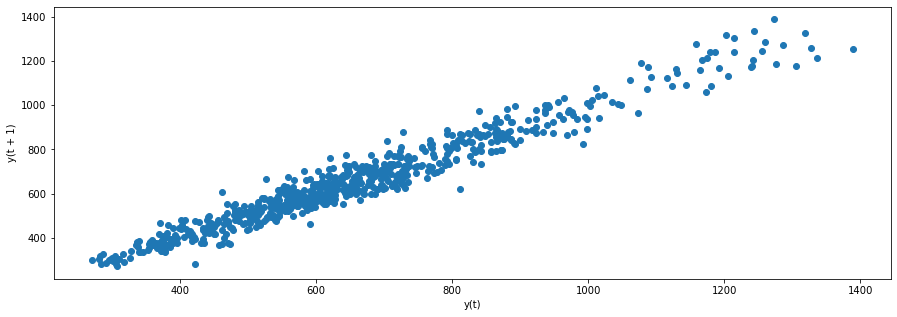

In [20]:
from pandas.plotting import lag_plot
plt.rcParams["figure.figsize"] = [15,5]
lag_plot(series)

In [8]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


In [9]:
series=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv",header=0,index_col=0)
values=DataFrame(series.values)
dataframe=concat([values.shift(1),values],axis=1)
dataframe.columns=['t-1','t+1']
results=dataframe.corr()
results

,t-1,t+1
t-1,1.000000,0.974116
t+1,0.974116,1.000000


In [10]:
from pandas.plotting import autocorrelation_plot


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

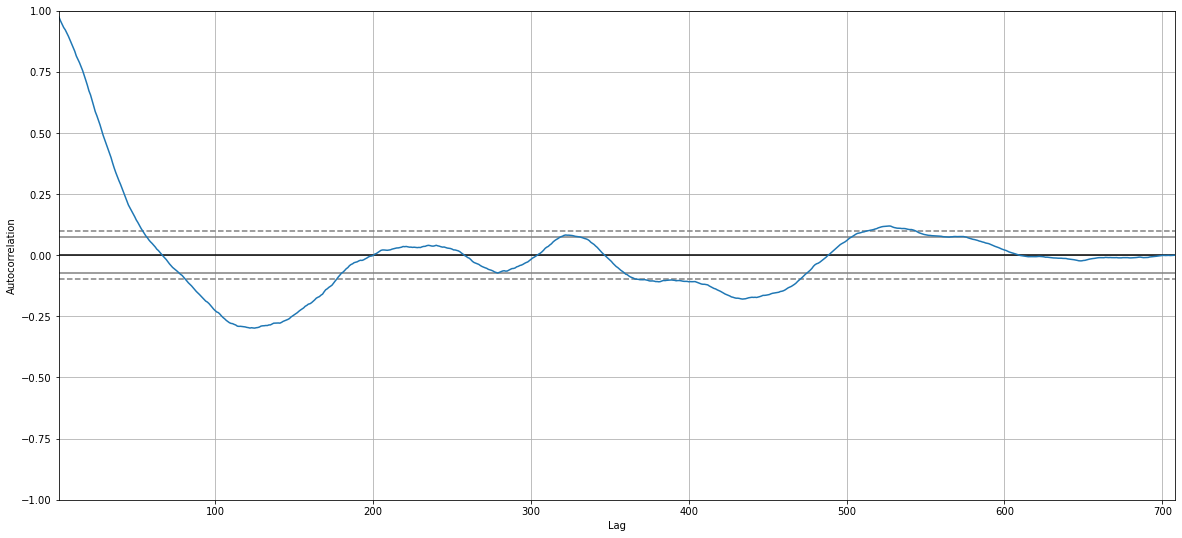

In [11]:
series=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv",header=0,index_col=0)
autocorrelation_plot(series)


In [12]:
###  # create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
series=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv",header=0,index_col=0,parse_dates=True,squeeze=True)
x=series.values
x

array([ 591,  464,  461,  605,  586,  526,  665,  570,  590,  567,  579,
        514,  549,  609,  562,  559,  523,  580,  575,  582,  590,  583,
        548,  540,  533,  559,  556,  555,  544,  614,  554,  615,  587,
        555,  616,  609,  599,  541,  557,  545,  499,  434,  435,  377,
        358,  387,  382,  369,  416,  408,  439,  479,  503,  499,  515,
        504,  531,  566,  500,  502,  494,  543,  490,  501,  441,  441,
        493,  507,  501,  502,  469,  511,  480,  524,  474,  450,  447,
        461,  436,  422,  396,  401,  441,  452,  461,  373,  389,  445,
        466,  485,  481,  515,  564,  545,  570,  582,  618,  618,  681,
        662,  618,  646,  706,  659,  625,  647,  710,  689,  698,  711,
        640,  684,  677,  687,  681,  773,  767,  843,  735,  772,  781,
        737,  725,  661,  660,  650,  601,  566,  561,  565,  547,  519,
        523,  539,  572,  544,  590,  534,  534,  492,  511,  448,  450,
        417,  416,  422,  477,  543,  579,  557,  5

In [14]:
train,test=x[1:len(x)-7],x[len(x)-7:]


In [15]:
train

array([ 464,  461,  605,  586,  526,  665,  570,  590,  567,  579,  514,
        549,  609,  562,  559,  523,  580,  575,  582,  590,  583,  548,
        540,  533,  559,  556,  555,  544,  614,  554,  615,  587,  555,
        616,  609,  599,  541,  557,  545,  499,  434,  435,  377,  358,
        387,  382,  369,  416,  408,  439,  479,  503,  499,  515,  504,
        531,  566,  500,  502,  494,  543,  490,  501,  441,  441,  493,
        507,  501,  502,  469,  511,  480,  524,  474,  450,  447,  461,
        436,  422,  396,  401,  441,  452,  461,  373,  389,  445,  466,
        485,  481,  515,  564,  545,  570,  582,  618,  618,  681,  662,
        618,  646,  706,  659,  625,  647,  710,  689,  698,  711,  640,
        684,  677,  687,  681,  773,  767,  843,  735,  772,  781,  737,
        725,  661,  660,  650,  601,  566,  561,  565,  547,  519,  523,
        539,  572,  544,  590,  534,  534,  492,  511,  448,  450,  417,
        416,  422,  477,  543,  579,  557,  569,  5

In [16]:
test

array([683, 704, 668, 725, 649, 725, 811], dtype=int64)

Coefficients: [ 1.86363499e+01  7.84853889e-01  1.31070123e-01  3.22465481e-02
 -7.10689302e-02  1.60544294e-01 -1.70168438e-02  2.05970745e-02
 -6.93842994e-02  3.85177345e-02  4.86869370e-02 -4.62294010e-02
 -1.46583767e-01  1.07676179e-01  7.40961528e-02 -3.30393594e-02
  3.26543304e-02  1.11345956e-02 -1.37680457e-04  1.79638019e-02
 -1.61303014e-01  1.65014263e-01 -3.72437611e-02 -7.73743407e-02
 -1.61858493e-01  1.82472430e-01 -9.63568158e-03  4.85699094e-02
 -5.32533808e-02]
predicted=740.989863, expected=683.000000
predicted=736.620771, expected=704.000000
predicted=726.984437, expected=668.000000
predicted=725.106599, expected=725.000000
predicted=739.519607, expected=649.000000
predicted=774.881043, expected=725.000000
predicted=762.439507, expected=811.000000
Test RMSE: 54.702


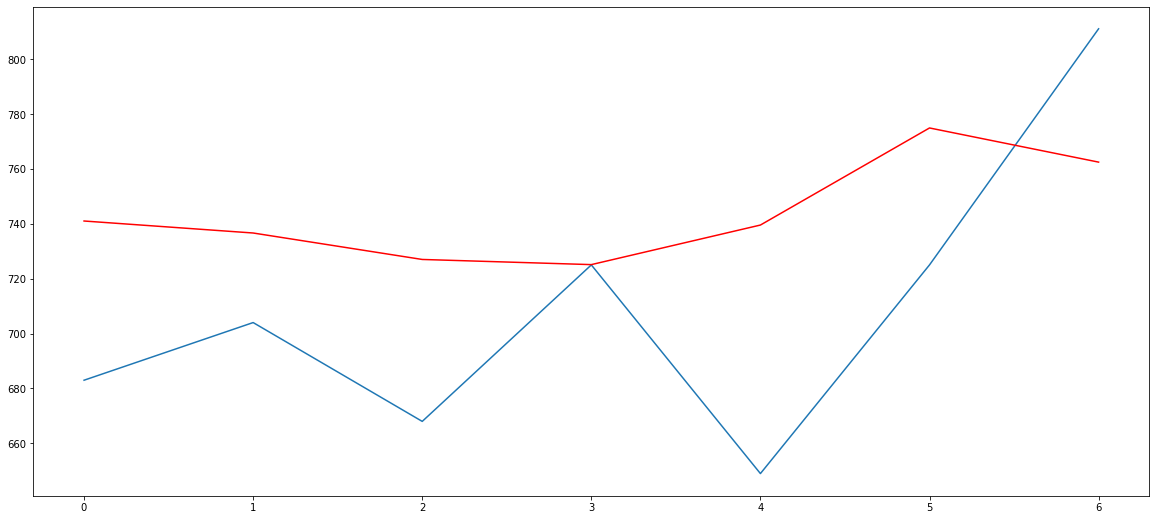

In [17]:
# load dataset
series = read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab1\\beer_sales.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=28)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.show()